In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
print(engine.table_names())

['measurement', 'station']


In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
Base.metadata.create_all(engine)

In [12]:
meas_firstrow = session.query(Measurement).first()
meas_firstrow.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1505b225f28>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [13]:
station_firstrow= session.query(Station).first()
station_firstrow.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1505b23ccf8>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US'}

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results 
#last date in data set
session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).limit(1).all()
#last year
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).order_by(Measurement.date.desc()).all()
data_df = pd.DataFrame(data, columns =["Date","Precipitation"])
data_df.head()

,Date,Precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


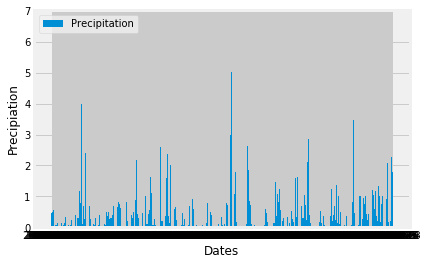

In [15]:
#graph
xaxis = data_df["Date"]
yaxis = data_df["Precipitation"]
plt.bar(xaxis, yaxis, label="Precipitation")
plt.legend(loc="best")
plt.xlabel("Dates")
plt.ylabel("Precipiation")
plt.show()

![precipitation](Images/precipitation.png)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [30]:
# Design a query to show how many stations are available in this dataset?
countofstations = session.query(Station.station).group_by(Station.station).count()
print(f"There are {countofstations} stations")

There are 9 stations


In [45]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print("USC00519281 is the most active station")

USC00519281 is the most active station


In [63]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
maxtemp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
mintemp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
avgtemp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

print(f"In Station USC00519281, the max temp recorded was {maxtemp}. The min temp recorded was {mintemp}. The average temp recorded was {avgtemp}")


In Station USC00519281, the max temp recorded was [(85.0,)]. The min temp recorded was [(54.0,)]. The average temp recorded was [(71.66378066378067,)]


Text(0, 0.5, 'Frequency')

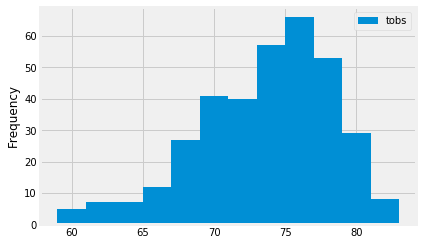

In [20]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.station, Measurement.tobs).order_by((Measurement.tobs).desc()).first()
top_tobs = session.query(Measurement.tobs).filter(Measurement.date >= last_year).filter(Measurement.station == "USC00519281").order_by(Measurement.tobs.desc()).all()
top_tobs_df = pd.DataFrame(top_tobs, columns =["USC00519281"])
bins = 12
plt.hist(top_tobs_df["USC00519281"],bins, histtype="bar", label="tobs")
plt.legend(loc="best")
plt.ylabel("Frequency")


![precipitation](Images/station-histogram.png)

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [24]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [25]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [26]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [27]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [28]:
# Plot the daily normals as an area plot with `stacked=False`
